In [70]:
import math
import matplotlib.pyplot as plt
import pandas as pd


palettes = [['#916eca', '#d05fad','#f2698b','#fd9e7e','#edba5e', '#916eca', '#d05fad','#f2698b','#fd9e7e','#edba5e'],
            ['#fc23d4','#b63be8','#1a53bc','#071e84','#171b38','#fc23d4','#b63be8','#1a53bc','#071e84','#171b38'],
            ['#13152e','#280c62','#3d1582','#c82165','#db4e4d','#13152e','#280c62','#3d1582','#c82165','#db4e4d']]

def generate_coords(layers, points, outer_points, pallete_id):
    palette = palettes[pallete_id]
    data = { 'level':[1],'x': [0], 'y': [0],'size': [50], 'color': [palette[0]] }
    for i in range(2,layers):
        r = i - 1
        o = 2**r
        offset = 0
        size = r*10
        angle = math.pi/(points/2)
        if(i%2 == 1):
            offset = math.pi/(points)
            size = r*5
        for j in range(0,points):
            data['level'].append(i)
            x = r*math.sin(offset + j*(angle))
            y = -1*r*math.cos(offset + j*(angle))
            data['x'].append(x/4)
            data['y'].append(y/4)
            data['size'].append(size)
            data['color'].append(palette[r])
            angle2 = math.pi/(outer_points/2)
            for k in range(0,outer_points):               
                data['level'].append(i*10)
                data['x'].append(x/4 + math.sin(k*(angle2))/7)
                data['y'].append(y/4 + -1*math.cos(k*(angle2))/7)
                data['size'].append(1)
                data['color'].append('#f0f0f0')        


    dfn = pd.DataFrame(data)      
    return dfn

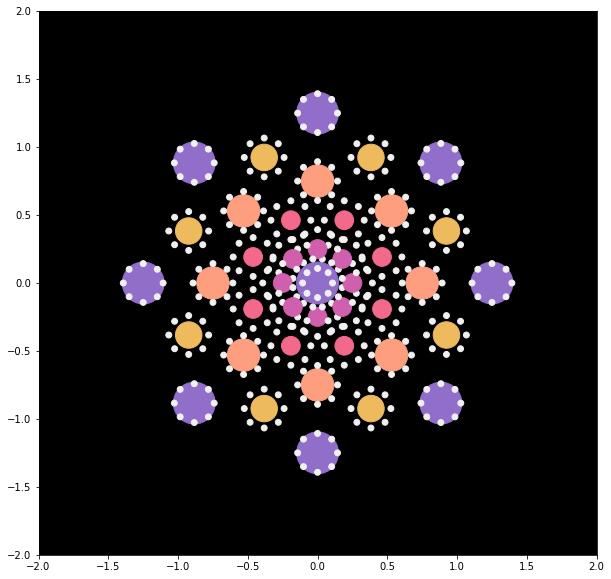

In [74]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
ax = plt.axes()
ax.set_facecolor("#000000")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.plot()

df = generate_coords(7,8,8,0)
plt.scatter(df['x'], df['y'], s= df['size']*35, c= df['color'])

plt.savefig("Art.png")
plt.show()
